# Prediksi Berat Badan

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import joblib
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("datasets/weight-height.csv")
df.head()

,Gender,Height,Weight
0,Male,241.893563,73.847017
1,Male,162.310473,68.781904
2,Male,212.740856,74.110105
3,Male,220.042470,71.730978
4,Male,206.349801,69.881796


In [3]:
df.iloc[:,1].head()


0    241.893563
1    162.310473
2    212.740856
3    220.042470
4    206.349801
Name: Height, dtype: float64

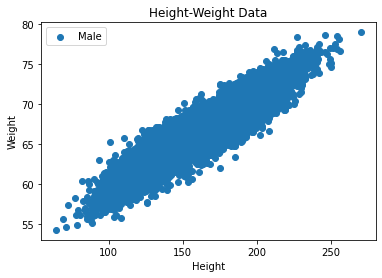

In [4]:
import matplotlib.pyplot as plt
plt.scatter(df.iloc[:,1], df.iloc[:,2])
plt.legend(df['Gender'])
plt.title('Height-Weight Data')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

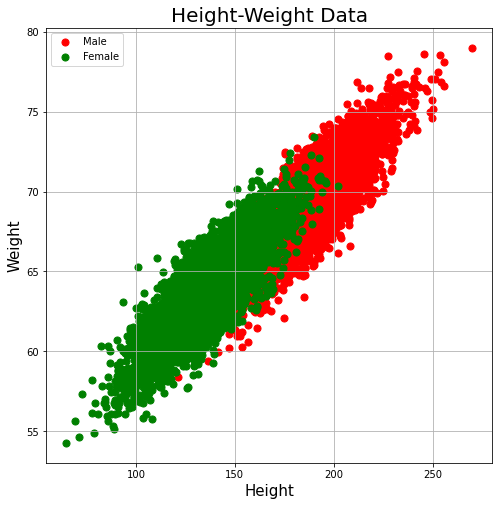

In [5]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Height', fontsize = 15)
ax.set_ylabel('Weight', fontsize = 15)
ax.set_title('Height-Weight Data', fontsize = 20)


targets = ['Male', 'Female']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = df['Gender'] == target
    ax.scatter(df.loc[indicesToKeep, 'Height']
               , df.loc[indicesToKeep, 'Weight']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

## Scaling dan Labeling Atribut

In [6]:
std_scaler = StandardScaler()
label_enc = LabelEncoder()

#df.iloc[:, ] = std_scaler.fit_transform(df.iloc[:, 0])
df.Gender = label_enc.fit_transform(df.Gender)

In [7]:
df.iloc[:,:-1 ] = std_scaler.fit_transform(df.iloc[:, :-1])


In [8]:
df.head()

,Gender,Height,Weight
0,1.0,2.505797,73.847017
1,1.0,0.027101,68.781904
2,1.0,1.597806,74.110105
3,1.0,1.825222,71.730978
4,1.0,1.398750,69.881796


In [9]:
X = df.iloc[:, :-1] #mengambil data train
y = df.iloc[:, -1]

In [ ]:
#nsamples, nx, ny = train_dataset.shape
#d2_train_dataset = train_dataset.reshape((nsamples,nx*ny))

## Training Model

In [10]:
# Fitting Multiple Linear Regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression() 

X_train, X_test, y_train, y_test = train_test_split(X, y)

model = regressor.fit(X_train, y_train)

In [11]:
accuracy = model.score(X_test, y_test)

In [12]:
print(f"Akurasi Model: {accuracy * 100}%")

Akurasi Model: 85.6987762048117%


In [13]:
#Melihat titik perpotongan y
print('Intercept :', regressor.intercept_) 
#Melihat koefisien regresi
print('Coefficient of predictor: ', regressor.coef_)

Intercept : 66.36722405609626
Coefficient of predictor:  [-0.49537656  3.95465272]


## Menyimpan Model dan Scaler

In [14]:
joblib.dump((model, std_scaler), "weight-classification-using-linear-regression.pkl")

['weight-classification-using-linear-regression.pkl']